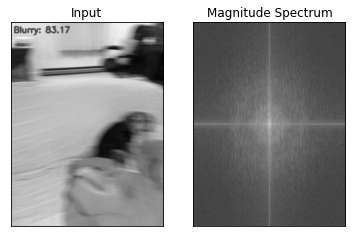

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import cv2

def detect_blur_fft(image, size=60, thresh=10, vis=False):
    # image：我们对模糊检测输入图像
    #size：以图像中心点为中心的半径的大小，我们将使FFT偏移为零
    #thresh：用于确定图像是否被认为是模糊的，将与震级的平均值(稍后详细说明)进行比较的一个值
    #vis：一个布尔值，指示是否使用matplotlib可视化/绘制原始输入图像和大小图像

    # grab the dimensions of the image and use the dimensions to
    # derive the center (x, y)-coordinates
    (h, w) = image.shape
    (cX, cY) = (int(w / 2.0), int(h / 2.0))

    # compute the FFT to find the frequency transform, then shift
    # the zero frequency component (i.e., DC component located at
    # the top-left corner) to the center where it will be more
    # easy to analyze
    fft = np.fft.fft2(image)
    fftShift = np.fft.fftshift(fft)



    # check to see if we are visualizing our output
    if vis:
        # compute the magnitude spectrum of the transform
        magnitude = 20 * np.log(np.abs(fftShift))
        # display the original input image
        (fig, ax) = plt.subplots(1, 2, )
        ax[0].imshow(image, cmap="gray")
        ax[0].set_title("Input")
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        # display the magnitude image
        ax[1].imshow(magnitude, cmap="gray")
        ax[1].set_title("Magnitude Spectrum")
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        # show our plots
        plt.show()

    # zero-out the center of the FFT shift (i.e., remove low
    # frequencies), apply the inverse shift such that the DC
    # component once again becomes the top-left, and then apply
    # the inverse FFT
    fftShift[cY - size:cY + size, cX - size:cX + size] = 0
    fftShift = np.fft.ifftshift(fftShift)
    recon = np.fft.ifft2(fftShift)


    # compute the magnitude spectrum of the reconstructed image,
    # then compute the mean of the magnitude values
    magnitude = 20 * np.log(np.abs(recon))
    mean = np.mean(magnitude)
    # the image will be considered "blurry" if the mean value of the
    # magnitudes is less than the threshold value
    return (mean, mean <= thresh )



imagePath = '../blur.png'

image = cv2.imdecode(np.fromfile(imagePath, dtype=np.uint8), -1)

# image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

(mean, is_blur ) = detect_blur_fft(gray, vis=True)

a = 1